In [4]:
from sklearn import datasets


In [3]:
boston = datasets.load_boston()

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [6]:
x = boston.data
y = boston.target

In [7]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#  import pandas
import pandas as pd

In [10]:
# Create dataframe of the boston data
boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df.shape[0]

506

In [12]:
# Create dataframe
y_df = pd.DataFrame(y)
y_df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
boston_df.columns=columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# check the shape of the DataFrame (rows, columns)
boston_df.shape

(506, 13)

In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
# conventional way to import seaborn
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline
boston_df_ext = boston_df.copy()
boston_df_ext['MEDV']=y

/home/fadwa/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


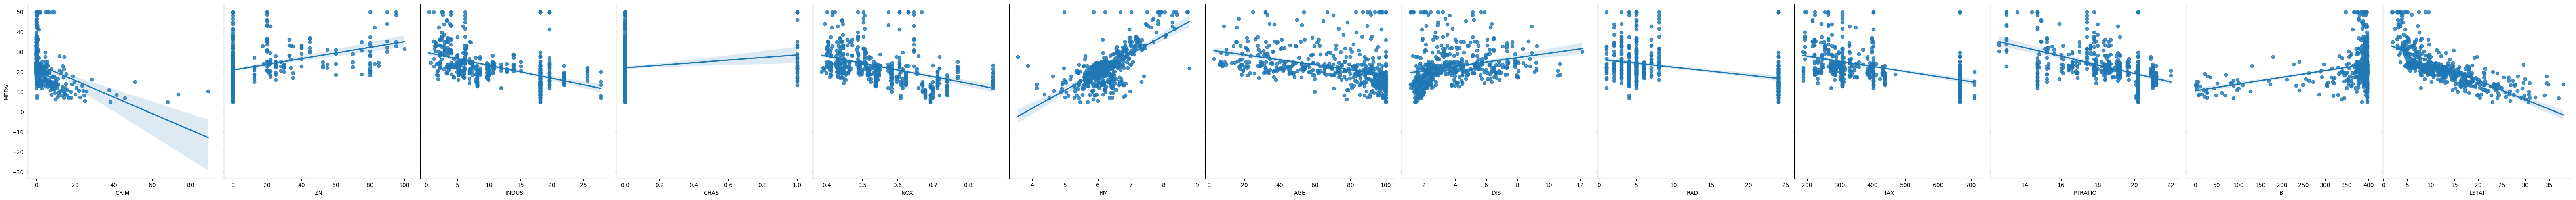

In [20]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(boston_df_ext, x_vars=columns, y_vars='MEDV', size=5,kind='reg')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [22]:
# default split is 80% for training and 20% for testing
#shuffle=True or false
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [23]:
# import model
from sklearn.linear_model import SGDRegressor

In [24]:
# instantiate
SGDreg = SGDRegressor()

# fit the model to the training data (learn the coefficients)
SGDreg.fit(X_train, y_train)

SGDRegressor()

In [25]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# print the intercept and coefficients
print(SGDreg.intercept_)

[-3.39969784e+09]


In [27]:
# pair the feature names with the coefficients
list(zip(columns, SGDreg.coef_))

[('CRIM', 415181908557.5552),
 ('ZN', -266890383339.8464),
 ('INDUS', 378449682735.0423),
 ('CHAS', -23373157136.43879),
 ('NOX', -6331138762.709306),
 ('RM', -60285182562.92951),
 ('AGE', 514652089753.42584),
 ('DIS', -317331635524.9482),
 ('RAD', -33743415685.142),
 ('TAX', -304717562236.5113),
 ('PTRATIO', -51283047864.362236),
 ('B', -95440384468.17822),
 ('LSTAT', 215685837766.89197)]

In [28]:
# print the intercept and coefficients
print(linreg.intercept_)

42.93352585337743


In [29]:
# pair the feature names with the coefficients
list(zip(columns, linreg.coef_))

[('CRIM', -0.11238686745728327),
 ('ZN', 0.05805870735149824),
 ('INDUS', 0.018359355933583767),
 ('CHAS', 2.129977599731913),
 ('NOX', -19.581101224686552),
 ('RM', 3.095461657079218),
 ('AGE', 0.00445265227565913),
 ('DIS', -1.5004762414744035),
 ('RAD', 0.30535896936796425),
 ('TAX', -0.011123087897877146),
 ('PTRATIO', -0.989007562322306),
 ('B', 0.007321300169404675),
 ('LSTAT', -0.5446449971618609)]

In [30]:
# make predictions on the testing set
y_SGDRpred = SGDreg.predict(X_test)

In [31]:
# make predictions on the testing set
y_LRpred = linreg.predict(X_test)

In [32]:
import numpy as np
from sklearn import metrics

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_LRpred)))

4.8353734582005465


In [34]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_SGDRpred)))

131119403483384.48


In [36]:
boston_df.iloc[50:51].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45


In [37]:
# tray many example by changing the index of row
y_pred = linreg.predict(boston_df.iloc[50:51])
print('- could got a price of :{} '.format(y_pred) )

- could got a price of :[21.56039533] 


/home/fadwa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [38]:
print('- Real price is :{} '.format(y[50]) )

- Real price is :19.7 


/home/fadwa/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

<AxesSubplot:>

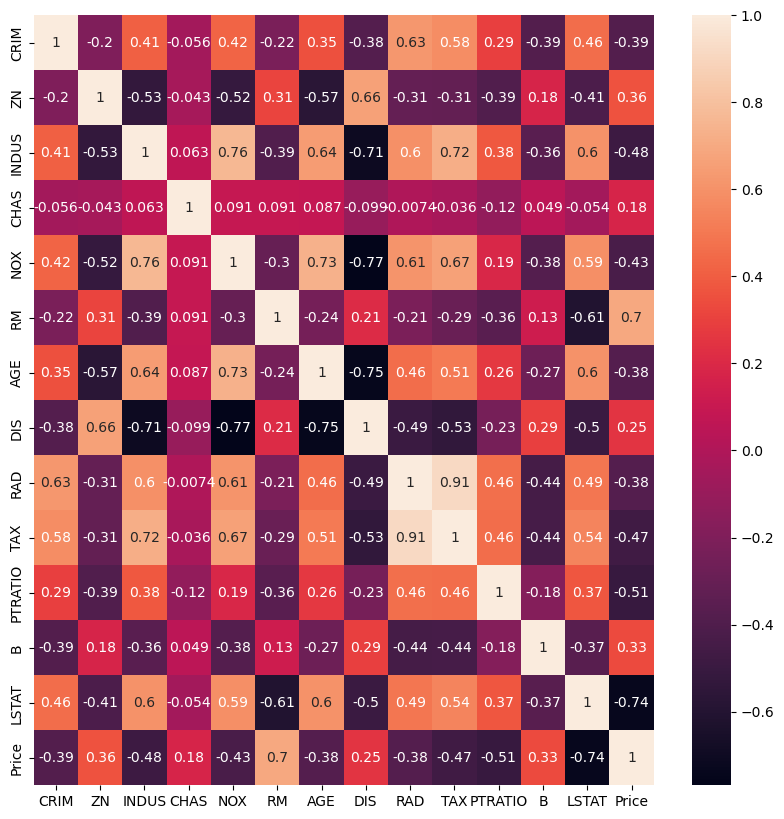

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

#data
boston = load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#target variable
boston_df['Price']=boston.target
#preview
boston_df.head()

#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(boston_df.corr(), annot = True)

In [43]:
#preview
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

#X and y values
X = boston_df[features].values
y = boston_df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


In [44]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.7859187129718976
The test score for lr model is 0.7672379770848983

Ridge Model............................................

The train score for ridge model is 0.7844233397895741
The test score for ridge model is 0.7696722158755338


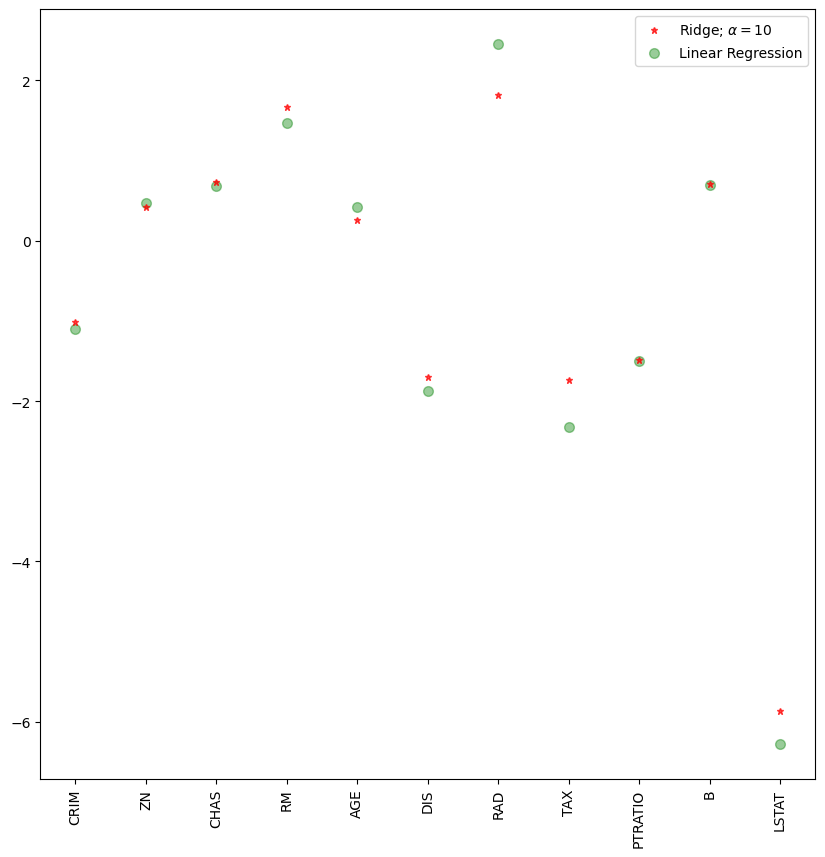

In [45]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()